In [1]:
import pandas as pd

#Reading In Datasets and Merging Together
df1 = pd.read_csv('Per100.csv')
df2 = pd.read_csv('Advanced.csv')
df3 = pd.read_csv('PlayByPlay.csv')
df4 = pd.read_csv('Shooting.csv')
df5 = pd.read_csv('AdjShooting.csv')

df = df1.merge(df2, on=['Player', 'Team', 'Rk', 'Age', 'Pos', 'G' , 'GS', 'MP']) \
            .merge(df3, on=['Player', 'Team', 'Rk', 'Age', 'Pos', 'G' , 'GS', 'MP']) \
            .merge(df4, on=['Player', 'Team', 'Rk', 'Age', 'Pos', 'G' , 'GS', 'MP', 'FG%']) \
            .merge(df5, on=['Player', 'Team', 'Rk', 'Age', 'Pos', 'G' , 'GS', 'MP', 'FG%', '2P%', '3P%', 'eFG%', 'FT%', 'TS%', 'FTr', '3PAr'])

#Filtering Players Out Based On GP and MP Requirement
df_filtered = df[(df['MP'] >= 500) & (df['G'] >= 25)]

#Dropping Duplicates Where Players Played For Multiple Teams
df_unique = df_filtered.drop_duplicates(subset='Player', keep='first')

#Dropping Features That Will Not Be Used
df_clean = df_unique.drop(columns=['Rk', 'Team', 'GS', 'MP'])
df_clean = df_clean.drop(columns=['Pos'])
df_clean = df_clean.drop(columns=['G'])
df_clean = df_clean.drop(columns=['BadPass', 'LostBall', 'Shoot Commit', 'Off. Commit', 'Shoot Drawn', 'Off. Drawn', 'PGA', 'And1' , 'Blkd', '%FGA Dunks', 'Total Dunks', 'FG', '2P', '3P', 'FT'])
df_clean = df_clean.drop(columns=['FG+', '2P+', '3P+', 'eFG+', 'FT+', 'TS+', 'FTr+', '3PAr+'])
df_clean = df_clean.drop(columns=['FG Add', 'TS Add', 'FG%', 'FT%','PTS','TRB','ORB', 'DRB','AST', 'STL', 'BLK', 'TOV', 'PF','TRB%', 'WS', '2P FG', '3P FG', '2PA', '3PA', '2P Assist', '3P Assist '])
df_clean = df_clean.drop(columns=['FGA',
    '2P%',
    'eFG%',
    '2P FGA',
    '3P FGA',
    'WS/48','Dist.'])
df_clean = df_clean.drop(columns=['FTA'])
df_clean = df_clean.drop(columns=['Age'])

#Drop Players That Have NA Values
df_clean = df_clean.dropna()

#Converting Percentages To Decimal Form
percent_cols = ['ORB%', 'DRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'PG%', 'SG%', 'SF%', 'PF%', 'C%']
df_clean[percent_cols] = df_clean[percent_cols] / 100
df_clean[percent_cols] = df_clean[percent_cols].round(3)
df_clean.to_csv('clean.csv', index=False)
df_clean.head()

,Player,3P%,ORtg,DRtg,PER,TS%,3PAr,FTr,ORB%,DRB%,...,0-3 FGA,3-10 FGA,10-16 FGA,16-3P FGA,0-3 FG,3-10 FG,10-16 FG,16-3P,%3PA Corner,3P% Corner
0,Mikal Bridges,0.354,117.0,118.0,14.0,0.585,0.391,0.100,0.027,0.070,...,0.185,0.189,0.192,0.042,0.785,0.513,0.507,0.520,0.449,0.423
1,Josh Hart,0.333,125.0,112.0,16.5,0.611,0.327,0.266,0.064,0.226,...,0.408,0.162,0.066,0.036,0.732,0.440,0.412,0.500,0.258,0.308
2,Anthony Edwards,0.395,115.0,112.0,20.1,0.595,0.503,0.308,0.024,0.148,...,0.176,0.158,0.084,0.080,0.678,0.453,0.341,0.372,0.107,0.414
3,Devin Booker,0.332,119.0,123.0,19.3,0.589,0.388,0.340,0.031,0.089,...,0.109,0.175,0.206,0.123,0.690,0.492,0.531,0.500,0.123,0.338
4,James Harden,0.352,114.0,110.0,20.0,0.582,0.516,0.446,0.023,0.161,...,0.106,0.232,0.122,0.024,0.657,0.422,0.405,0.484,0.042,0.429


In [2]:
#Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean.drop(columns=['Player']))

In [3]:
#PCA
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

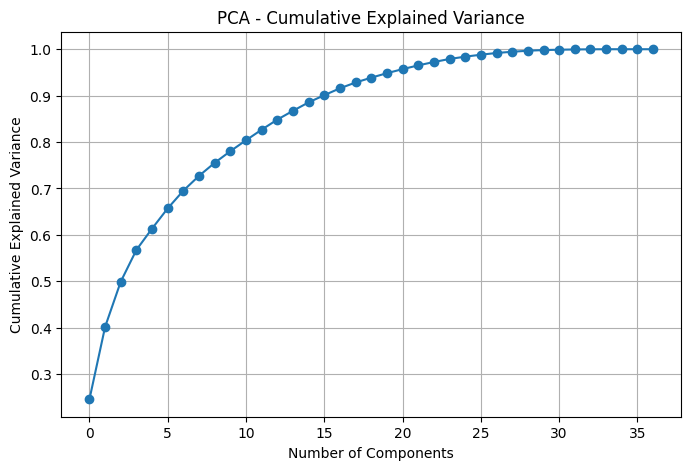

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

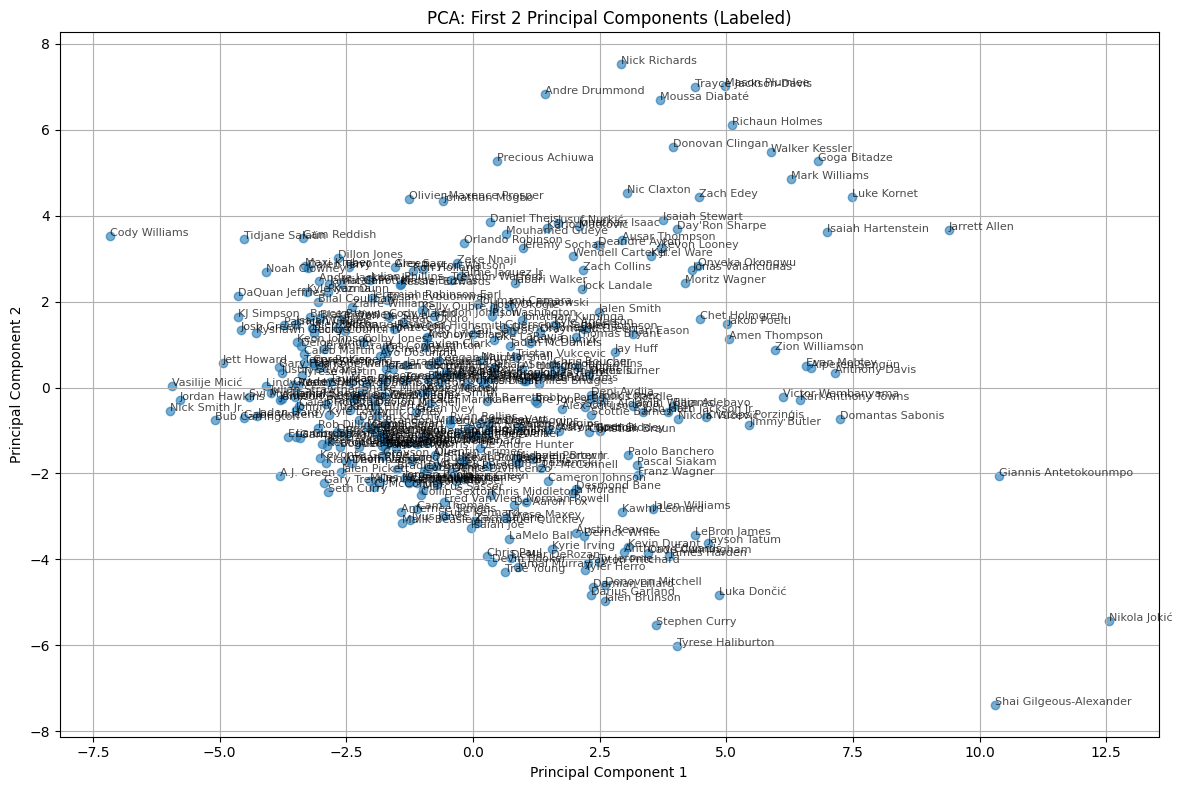

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.6)

# Add player names
for i, name in enumerate(df_clean['Player']):
    plt.text(X_pca_2d[i, 0], X_pca_2d[i, 1], name, fontsize=8, alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First 2 Principal Components (Labeled)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
# Applies PCA to reduce the dimensionality of the scaled data to 17 components
pca = PCA(n_components=17)  
X_reduced = pca.fit_transform(X_scaled)

In [7]:
#GMM Model
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import multivariate_normal

class CustomMAPGMM:
    def __init__(self, n_components, max_iter=100, tol=1e-4, alpha=1.0, 
                 init_method='kmeans', random_state=42):
        """
        Parameters:
        - n_components: Number of clusters
        - max_iter: Maximum number of EM iterations
        - tol: Convergence threshold for log-likelihood
        - alpha: Dirichlet prior parameter for mixture weights (can be scalar or array)
        - init_method: How to initialize parameters ('kmeans' or 'random')
        - random_state: Random seed for reproducibility
        """
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.alpha = np.full(n_components, alpha) if np.isscalar(alpha) else np.asarray(alpha)
        self.init_method = init_method
        self.random_state = random_state

        # Placeholders for parameters
        self.pi_ = [None] * self.n_components
        self.mu_ = [None] * self.n_components
        self.sigma_ = [None] * self.n_components
        self.resp_ = None
        self.log_likelihood_ = []
        
    def initialize_params(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        #KMeans Initialization
        kmeans = KMeans(n_clusters=self.n_components, random_state=0)
        kmeans.fit(X)
        
        #Extracting parameters
        labels = kmeans.labels_
        self.mu_ = kmeans.cluster_centers_
        for k in range(self.n_components):
            self.sigma_[k] = np.cov(X[labels==k].T)
            self.pi_[k] = len(X[labels == k]) / n_samples
            
    def fit(self, X):
        #Initializing Parameters
        self.initialize_params(X)
        
        n_samples, n_features = X.shape
        
        for iteration in range(self.max_iter):
            #E-Step
            self.resp_ = np.zeros((n_samples, self.n_components))
            for i in range(n_samples):
                likelihood=[]
                total_likelihood = 0
                for j in range(self.n_components):
                    x =  multivariate_normal.pdf(X[i], mean=self.mu_[j], cov=self.sigma_[j],allow_singular=True)
                    likelihood.append(self.pi_[j] * x)
                    total_likelihood += self.pi_[j] * x
                self.resp_[i,] = likelihood /total_likelihood


            #M-Step
            total = 0
            top=[]
            for k in range(self.n_components):
                N_k = np.sum(self.resp_[:, k])
                top.append(N_k + self.alpha[k])
                total += N_k + self.alpha[k]

                mean_total=np.zeros(X.shape[1])
                for i in range(n_samples):
                    mean_total += self.resp_[i,k] * X[i]

                self.mu_[k] = mean_total / N_k

            self.pi_ = np.array(top) / total

            for k in range(self.n_components):
                N_k = np.sum(self.resp_[:, k])
                cov_total=np.zeros((X.shape[1], X.shape[1]))
                for i in range(n_samples):
                    cov_total += self.resp_[i, k] * np.outer(X[i] - self.mu_[k], X[i] - self.mu_[k])
                self.sigma_[k] = cov_total / N_k
            
            #Log-Likelihood
            log_like = 0
            for i in range(n_samples):
                temp = 0
                for k in range(self.n_components):
                    temp += self.pi_[k] * multivariate_normal.pdf(X[i], mean=self.mu_[k], cov=self.sigma_[k], allow_singular=True)
                log_like += np.log(temp)
                    
            self.log_likelihood_.append(log_like)
            
            #Convergence Check
            if iteration > 0 and abs(log_like - self.log_likelihood_[-2]) < self.tol:
                break
                
    # Hard assigning players to clusters based on highest responsibility
    def predict(self, X):
        n_samples, n_features = X.shape
        
        self.resp_ = np.zeros((n_samples, self.n_components))
        for i in range(n_samples):
            likelihood=[]
            total_likelihood = 0
            for j in range(self.n_components):
                x =  multivariate_normal.pdf(X[i], mean=self.mu_[j], cov=self.sigma_[j], allow_singular=True)
                likelihood.append(self.pi_[j] * x)
                total_likelihood += self.pi_[j] * x
            self.resp_[i,] = likelihood /total_likelihood
                
        return np.argmax(self.resp_, axis=1) 
            
    # Computes the average log-likelihood of the data
    def score(self, X):
        n_samples = X.shape[0]
        log_likelihood = 0
        for i in range(n_samples):
            temp = 0
            for k in range(self.n_components):
                temp += self.pi_[k] * multivariate_normal.pdf(
                    X[i], mean=self.mu_[k], cov=self.sigma_[k], allow_singular=True
                )
            log_likelihood += np.log(temp)
        return log_likelihood / n_samples
                
        return self.resp_ 

In [7]:
#Model With Best Visual Clusters
gmm = CustomMAPGMM(n_components=15,alpha=1)
gmm.fit(X_reduced)
df_clean['Cluster'] = gmm.predict(X_reduced) + 1

for i in range(1,16):
    print(f"\n🔹 Cluster {i} Players:")
    print(df_clean[df_clean['Cluster'] == i]['Player'].values)

/Users/vishal/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



🔹 Cluster 1 Players:
['Jaden McDaniels' 'Dyson Daniels' 'Amen Thompson' 'Cason Wallace'
 'Kris Dunn' 'Tari Eason' 'Ausar Thompson' 'Jonathan Isaac' 'Alex Caruso'
 'Josh Okogie' 'Mouhamed Gueye' 'Jaylen Clark']

🔹 Cluster 2 Players:
['Kelly Oubre Jr.' 'Bilal Coulibaly' 'Josh Green' 'Zaccharie Risacher'
 'Keldon Johnson' 'Peyton Watson' 'Tristan Da Silva' 'Ziaire Williams'
 'Jerami Grant' 'Matas Buzelis' 'Ryan Dunn' 'Ayo Dosunmu'
 'Julian Strawther' 'Jaime Jaquez Jr.' 'Ron Holland' 'Javonte Green'
 'Jeremiah Robinson-Earl' 'Caleb Martin' 'Cody Martin' 'Julian Phillips'
 'Isaac Okoro' 'Dalen Terry' 'Andre Jackson Jr.' 'Bruce Brown'
 'Talen Horton-Tucker' 'Tosan Evbuomwan' 'Kessler Edwards' 'Cam Reddish'
 'Olivier-Maxence Prosper' 'Colby Jones' 'Jamal Cain']

🔹 Cluster 3 Players:
['Dillon Brooks' 'Malik Beasley' 'Kentavious Caldwell-Pope'
 'Shaedon Sharpe' 'Taurean Prince' 'Tim Hardaway Jr.' 'Max Christie'
 'Nickeil Alexander-Walker' 'Jaylen Wells' 'Devin Vassell' 'Klay Thompson'
 'Gary T